# Polish tweets annotations

In [1]:
import pickle
from os.path import join

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = join("../data/wust_2k20_twitter_emotion_annotations.json")

In [3]:
df = pd.read_json(path)
df

,id,tweet,most_common_annotation,annotation_1,annotation_2,annotation_3,num_different_annotations,num_total_annotations
0,1320158927217197056,Miesięczny (30 dni) przyrost zgonów na #korona...,neutralne,neutralne,neutralne,neutralne,1.0,3
1,1196353360284332032,#WROCŁAWAktualna #MAPA korków przekraczających...,neutralne,neutralne,neutralne,neutralne,1.0,3
2,281016917563682816,Wigilię w @krecisie czas zacząć #christmas #św...,neutralne,radosc,neutralne,neutralne,2.0,3
3,1319551055424794624,Dzisiaj szału nie będzie. Nie bez powodu robi ...,smutek,smutek,neutralne,smutek,2.0,3
4,1314223009431982080,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...,podziw,podziw,podziw,podziw,1.0,3
...,...,...,...,...,...,...,...,...
5396,696339670028963840,Nowoczesna technologia nie zmieniła ludzkiej n...,neutralne,neutralne,smutek,neutralne,2.0,3
5397,319081006172876800,"Jak patrzę na jedzenie, to mi się odechciewa O...",wstret,wstret,wstret,zaskoczenie,2.0,3
5398,396538989210902528,HAHAHAHA ŚWIĄTECZNA REKLAMA ORANGE NA POLSACE ...,zaskoczenie,zaskoczenie,radosc,zaskoczenie,2.0,3
5399,189367806494654464,"@iGrabann a przepraszam, faktycznie, pomyłka, ...",radosc,neutralne,radosc,radosc,2.0,3


# Three annotations

## Three same annotations

In [4]:
three_annotations_one_emotion_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 1)] 

f"{len(three_annotations_one_emotion_df)} tweets with 3 annotations and 1 emotion"

'2235 tweets with 3 annotations and 1 emotion'

## Two same one different

In [5]:
three_annotations_two_emotions_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 2)] 


f"{len(three_annotations_two_emotions_df)} tweets with 3 annotations and 2 emotions"

'1852 tweets with 3 annotations and 2 emotions'

## All three different

In [6]:
three_annotations_three_emotions_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 3)] 


f"{len(three_annotations_three_emotions_df)} tweets with 3 annotations and 3 emotions"

'542 tweets with 3 annotations and 3 emotions'

# Two annotations

## Two same annotations

In [7]:
two_annotations_one_emotion_df = df[(df.num_total_annotations == 2) & (df.num_different_annotations == 1)]  


f"{len(two_annotations_one_emotion_df)} tweets with 2 annotations and 1 emotion"

'124 tweets with 2 annotations and 1 emotion'

## Two different annotations 

In [8]:
two_annotations_two_emotions_df = df[(df.num_total_annotations == 2) & (df.num_different_annotations == 2)]  


f"{len(two_annotations_two_emotions_df)} tweets with 2 annotations and 2 emotions"

'50 tweets with 2 annotations and 2 emotions'

# Single annotation

In [9]:
one_annotation_df = df[df.num_total_annotations == 1] 

f"{len(one_annotation_df)} tweets with 1 annotations and 1 emotion"

'232 tweets with 1 annotations and 1 emotion'

# No annotation

In [10]:
no_annotation_df = df[df.num_total_annotations == 0] 

f"{len(no_annotation_df)} tweets without an annotation"

'366 tweets without an annotation'

## Sum of lengths of subsets of annotation

In [11]:
len(three_annotations_one_emotion_df) + len(three_annotations_two_emotions_df) + len(three_annotations_three_emotions_df) + len(two_annotations_one_emotion_df) + len(two_annotations_two_emotions_df) + len(one_annotation_df) + len(no_annotation_df)

5401

# EDA

In [12]:
frames = [three_annotations_one_emotion_df, three_annotations_two_emotions_df, two_annotations_one_emotion_df]

reliable_df = pd.concat(frames)
# reliable_df = reliable_df[reliable_df.most_common_annotation != "neutralne"]
len(reliable_df)

4211

In [13]:
reliable_df.most_common_annotation.value_counts()

neutralne      2587
zlosc           464
radosc          414
podziw          258
oczekiwanie     139
wstret          118
smutek          103
strach           65
zaskoczenie      63
Name: most_common_annotation, dtype: int64

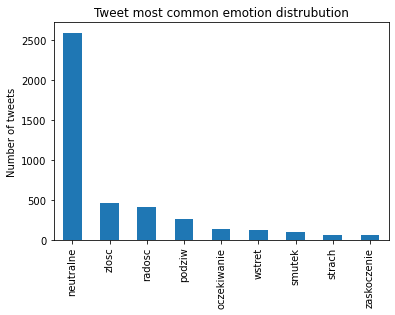

In [14]:
fig, ax = plt.subplots()
plt.title("Tweet most common emotion distrubution")
plt.ylabel("Number of tweets")
reliable_df['most_common_annotation'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [15]:
reliable_df_without_neutral = reliable_df[reliable_df.most_common_annotation != "neutralne"]
len(reliable_df_without_neutral)

1624

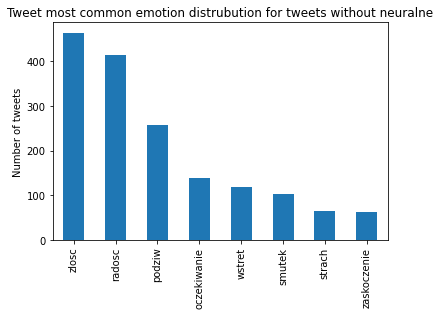

In [16]:
fig, ax = plt.subplots()
plt.title("Tweet most common emotion distrubution for tweets without neuralne")
plt.ylabel("Number of tweets")
reliable_df_without_neutral['most_common_annotation'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [17]:
reliable_df.head(5)

,id,tweet,most_common_annotation,annotation_1,annotation_2,annotation_3,num_different_annotations,num_total_annotations
0,1320158927217197056,Miesięczny (30 dni) przyrost zgonów na #korona...,neutralne,neutralne,neutralne,neutralne,1.0,3
1,1196353360284332032,#WROCŁAWAktualna #MAPA korków przekraczających...,neutralne,neutralne,neutralne,neutralne,1.0,3
4,1314223009431982080,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...,podziw,podziw,podziw,podziw,1.0,3
9,761195490746703872,3 typowe błędy w kryzysie w mediach społecznoś...,neutralne,neutralne,neutralne,neutralne,1.0,3
10,1320132810288566272,Katowice. Dzisiaj kto będzie?#protestkobiet #p...,neutralne,neutralne,neutralne,neutralne,1.0,3


In [26]:
reliable_df = reliable_df.reset_index(drop=True)

In [27]:
X = reliable_df['tweet']
y = reliable_df['most_common_annotation']

In [28]:
with open('../data/dataset.pickle', 'wb') as handle:
    pickle.dump((X, y), handle)

In [31]:
len(reliable_df)

4211